# Emotion Detection

#### *Importing Libraries*

In [25]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
import tensorflow as tf
print("Tensorflow version:",tf.__version__)


Tensorflow version: 2.16.1


### *Exploring Dataset*

In [26]:
images = glob("../data/train/**/**")

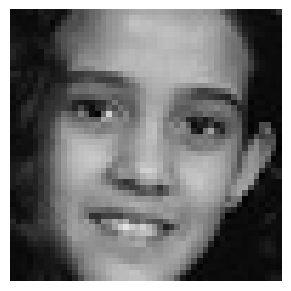

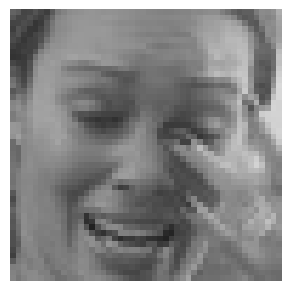

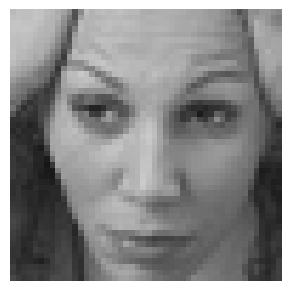

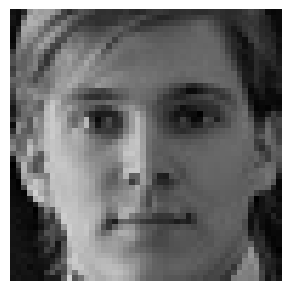

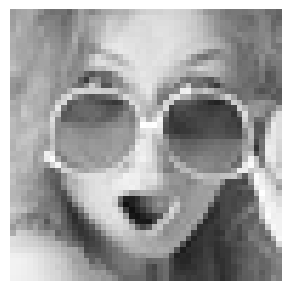

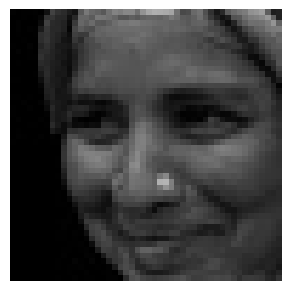

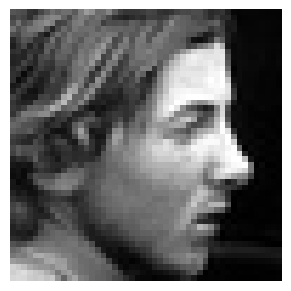

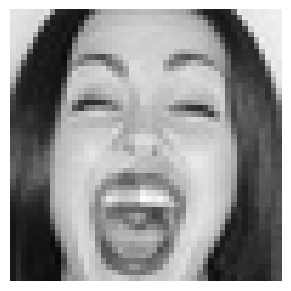

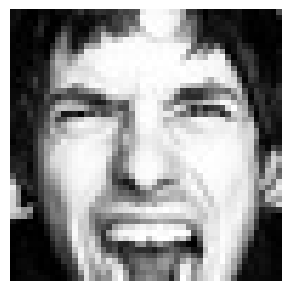

In [27]:
for i in range(9):
    image = random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis('off')
    

### *Preparing Data for Training* 

In [28]:
img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("../data/train/", target_size = (img_size,img_size), color_mode = "grayscale", batch_size = batch_size, class_mode = "categorical", shuffle = True)


datagen_validation = ImageDataGenerator()
validation_generator = datagen_train.flow_from_directory("../data/test/", target_size=(
    img_size, img_size), color_mode="grayscale", batch_size=batch_size, class_mode="categorical", shuffle=True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


### *Defining Model*

In [29]:
def convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size, padding="same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)

    return x

In [30]:
def dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dropout(0.25)(x)

    return x

In [31]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = convolution(inputs, 32, (3,3))
    conv_2 = convolution(inputs, 64, (5,5))
    conv_3 = convolution(inputs, 128, (3, 3))

    flatten = Flatten()(conv_3)

    dense_1 = dense_f(flatten, 256)

    output = Dense(7, activation= "softmax")(dense_1)

    model = Model(inputs= [inputs], outputs = [output])

    model.compile(loss = ['categorical_crossentropy'], optimizer = 'Adam', metrics = ['accuracy'])

    return model

In [32]:
model = model_fer((48,48,1))

model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 48, 48, 128)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 48, 48, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 48, 48, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 73728)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    18,874,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,879,239 (72.02 MB)

 Trainable params: 18,878,471 (72.02 MB)

 Non-trainable params: 768 (3.00 KB)

### *Initializing the Model*

In [33]:
epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weights.weights.h5", monitor = 'val_accuracy', save_weights_only = True, mode = 'max', verbose = 1)
callbacks = [checkpoint]

# Training the Model

In [34]:
history = model.fit(x=train_generator, steps_per_epoch = steps_per_epoch, epochs=epochs, validation_data = validation_generator, validation_steps=validation_steps, callbacks=callbacks)

Epoch 1/15


c:\Users\neerb\OneDrive\Documents\GitHub\sensa\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 507ms/step - accuracy: 0.3214 - loss: 1.8308
Epoch 1: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 236s 522ms/step - accuracy: 0.3216 - loss: 1.8304 - val_accuracy: 0.3548 - val_loss: 1.7545
Epoch 2/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 2:59 401ms/step - accuracy: 0.3438 - loss: 1.6187
Epoch 2: saving model to model_weights.weights.h5


C:\Python310\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 961us/step - accuracy: 0.3438 - loss: 0.8112 - val_accuracy: 0.4000 - val_loss: 0.8642
Epoch 3/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step - accuracy: 0.4882 - loss: 1.3598
Epoch 3: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 192s 428ms/step - accuracy: 0.4882 - loss: 1.3598 - val_accuracy: 0.3764 - val_loss: 1.5368
Epoch 4/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 3:00 404ms/step - accuracy: 0.4531 - loss: 1.4257
Epoch 4: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 893us/step - accuracy: 0.4531 - loss: 0.7145 - val_accuracy: 0.2000 - val_loss: 0.8132
Epoch 5/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step - accuracy: 0.5578 - loss: 1.1835
Epoch 5: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 191s 427ms/step - accuracy: 0.5578 - loss: 1.1835 - val_accuracy: 0.4540 - val_loss: 1.4464
Epoch 6/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 3:01 407ms/step - accuracy: 0.5469 - loss: 1.2137
Epoch 6: savin

### *Model Evaluation*

In [35]:
model.evaluate(validation_generator)

113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - accuracy: 0.4729 - loss: 1.6371


[1.6519540548324585, 0.4710225760936737]

### *Plotting Loss* 

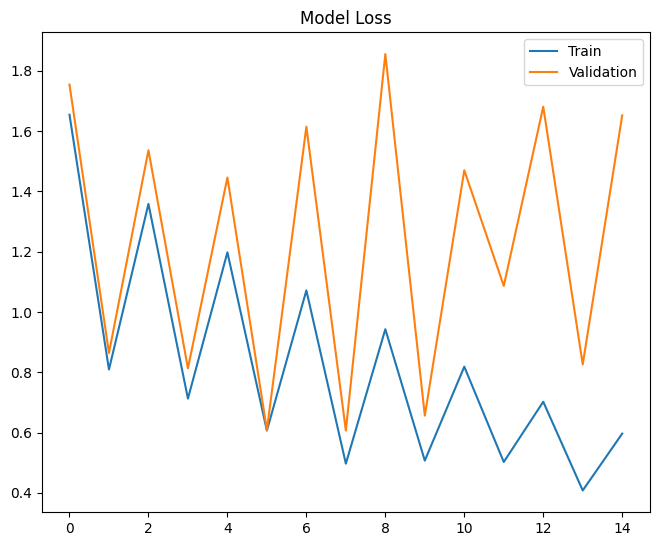

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation'], loc= 'upper right')
plt.subplots_adjust(top=1.0, bottom=0.0, right=0.95, left=0.0, hspace=0.25, wspace=0.35)

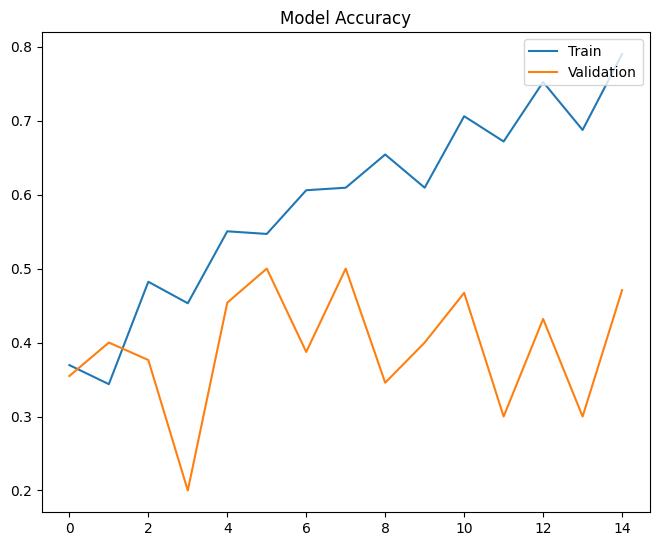

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.subplots_adjust(top=1.0, bottom=0.0, right=0.95,left=0.0, hspace=0.25, wspace=0.35)

### *Saving Model*

In [38]:
model_json = model.to_json()
with open("model_a.json",'w') as json_file:
    json_file.write(model_json)